# Results

In [15]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from src.helpers.visualization import plot_rul_from_dataframe
from src.helpers.metrics import  build_metrics_table

In [16]:
data_name = "DS03"
pf_dir_name = 'pf_perform_fullprior_128x128x64x32leaky0.05'

pf_dir = Path('experiments')/data_name/pf_dir_name

## Load Predictions

In [17]:
preds_df= pd.read_csv(pf_dir / "rul_test_predictions.csv")

## Metrics

In [18]:
metrics_df = build_metrics_table(preds_df, weights="linear")
metrics_df

,unit,RMSE,Score,PICP,PINAW
0,10,3.916692,35.014483,1.000000,0.465239
1,11,5.159331,31.548568,1.000000,0.394966
2,12,14.429246,373.708530,0.379213,0.298864
3,13,9.970025,107.959585,0.885845,0.322551
4,14,6.169043,63.800567,0.972222,0.410950
5,15,4.478046,24.371249,1.000000,0.427498


In [19]:
metrics_df.drop(columns=["unit"]).mean()

RMSE       7.353731
Score    106.067164
PICP       0.872880
PINAW      0.386678
dtype: float64

# Plot final RUL prediction

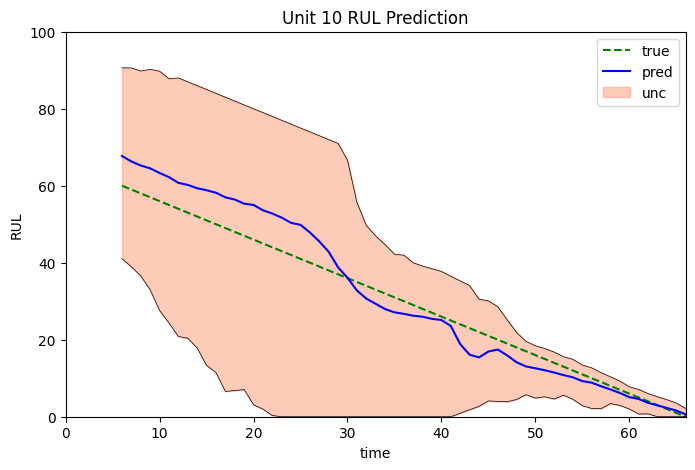

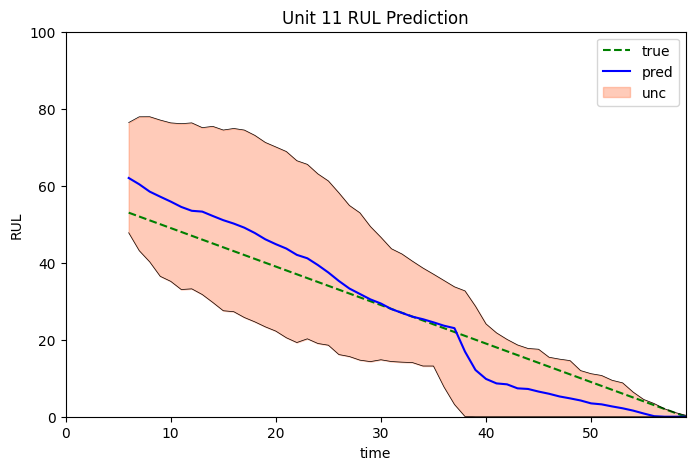

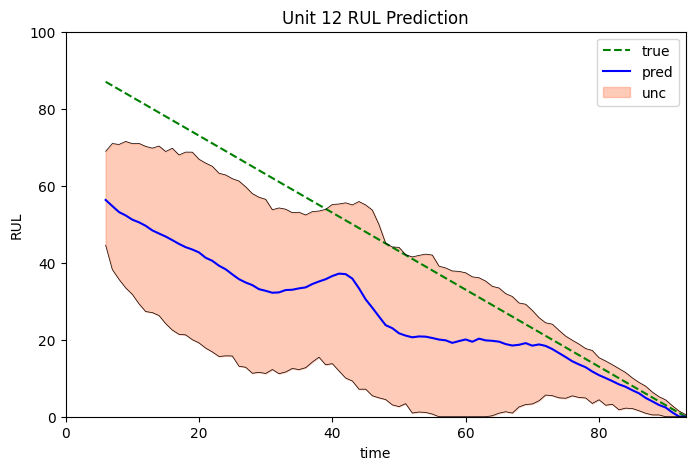

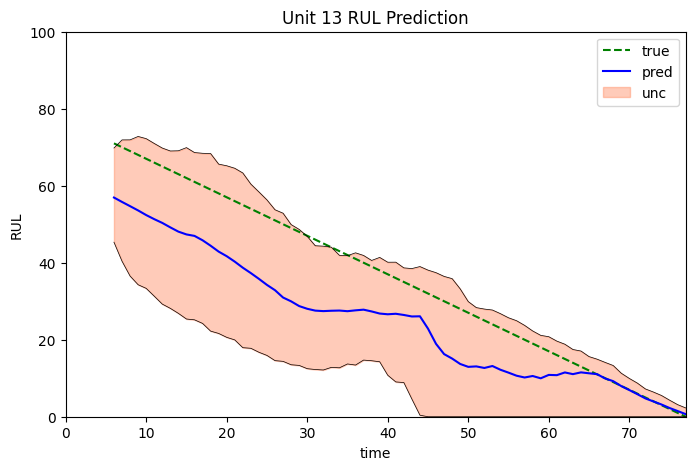

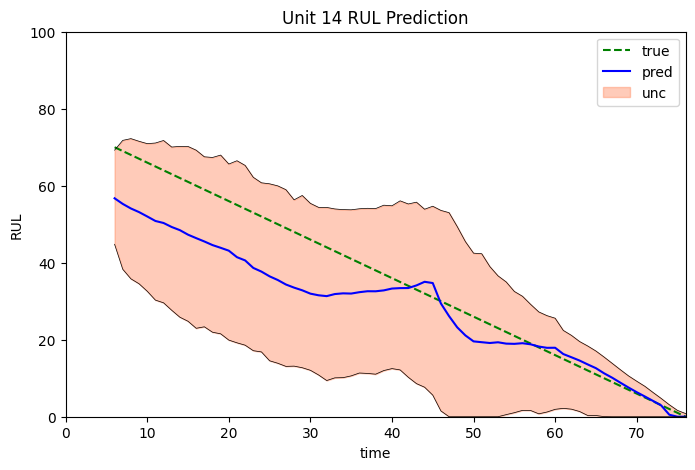

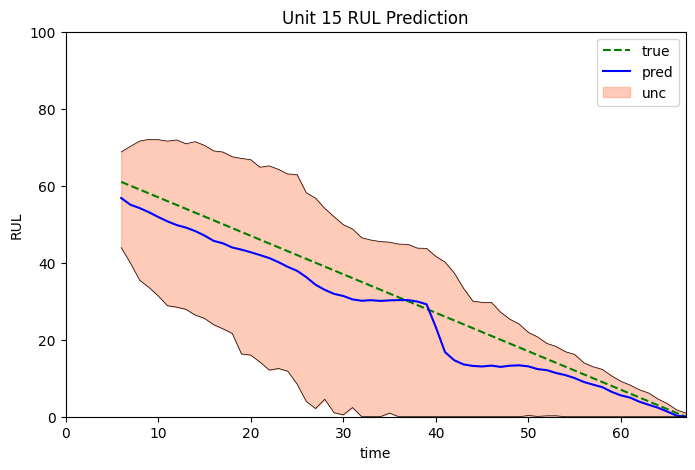

In [20]:
units = preds_df['unit'].unique()
for unit in units:
	fig, ax = plt.subplots(figsize=(8, 5))
	df = preds_df[preds_df['unit']==unit]
	eol_time = df['time'].iloc[-1]
	plot_rul_from_dataframe(ax=ax, df=preds_df[preds_df['unit']==unit], t_max=eol_time, 
			title=f"Unit {unit} RUL Prediction")
	fig.savefig(pf_dir / f'rul_pred_eval{unit}.png')